In [360]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarnings from seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

# Setting the aesthetics for the plots
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")


In [362]:
import os
dir= os.getcwd()
print(dir)

/Users/aselvara


In [364]:
# Load the datasets
df1 = pd.read_csv('/Users/aselvara/Downloads/Oasis_infobyte/Unemployment in India.csv')
df2 = pd.read_csv('/Users/aselvara/Downloads/Oasis_infobyte/Unemployment_Rate_upto_11_2020.csv')

df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [366]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [368]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [370]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [372]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')
df1 = df1.rename(columns={
    'estimated_unemployment_rate_(%)': 'unemployment_rate',
    'estimated_employed': 'estimated_employed',
    'estimated_labour_participation_rate_(%)': 'labour_participation_rate'
})

In [374]:
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_')
df2 = df2.rename(columns={
    'estimated_unemployment_rate_(%)': 'unemployment_rate'
})

In [376]:
df1.columns

Index(['region', 'date', 'frequency', 'unemployment_rate',
       'estimated_employed', 'labour_participation_rate', 'area'],
      dtype='object')

In [378]:
df2.columns

Index(['region', 'date', 'frequency', 'unemployment_rate',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'region.1', 'longitude', 'latitude'],
      dtype='object')

In [380]:
df2.dtypes

region                                      object
date                                        object
frequency                                   object
unemployment_rate                          float64
estimated_employed                           int64
estimated_labour_participation_rate_(%)    float64
region.1                                    object
longitude                                  float64
latitude                                   float64
dtype: object

In [382]:
df2['date'] = df2['date'].str.strip()


In [384]:
df2['date'] = pd.to_datetime(df2['date'], format='%d-%m-%Y', errors='coerce')


In [386]:
df2.dtypes

region                                             object
date                                       datetime64[ns]
frequency                                          object
unemployment_rate                                 float64
estimated_employed                                  int64
estimated_labour_participation_rate_(%)           float64
region.1                                           object
longitude                                         float64
latitude                                          float64
dtype: object

In [388]:
df2[df2['date'].isna()]

,region,date,frequency,unemployment_rate,estimated_employed,estimated_labour_participation_rate_(%),region.1,longitude,latitude


In [390]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [392]:
df2.dropna(inplace=True)

In [394]:
print("Summary statistics of df1:")
print(df1.describe())

Summary statistics of df1:
       unemployment_rate  estimated_employed  labour_participation_rate
count         740.000000        7.400000e+02                 740.000000
mean           11.787946        7.204460e+06                  42.630122
std            10.721298        8.087988e+06                   8.111094
min             0.000000        4.942000e+04                  13.330000
25%             4.657500        1.190404e+06                  38.062500
50%             8.350000        4.744178e+06                  41.160000
75%            15.887500        1.127549e+07                  45.505000
max            76.740000        4.577751e+07                  72.570000


In [396]:
print("Summary statistics of df2:")
print(df2.describe())


Summary statistics of df2:
                                date  unemployment_rate  estimated_employed  \
count                            267         267.000000        2.670000e+02   
mean   2020-06-16 09:15:30.337078528          12.236929        1.396211e+07   
min              2020-01-31 00:00:00           0.500000        1.175420e+05   
25%              2020-03-31 00:00:00           4.845000        2.838930e+06   
50%              2020-06-30 00:00:00           9.650000        9.732417e+06   
75%              2020-08-31 00:00:00          16.755000        2.187869e+07   
max              2020-10-31 00:00:00          75.850000        5.943376e+07   
std                              NaN          10.803283        1.336632e+07   

       estimated_labour_participation_rate_(%)   longitude    latitude  
count                               267.000000  267.000000  267.000000  
mean                                 41.681573   22.826048   80.532425  
min                                  16.77

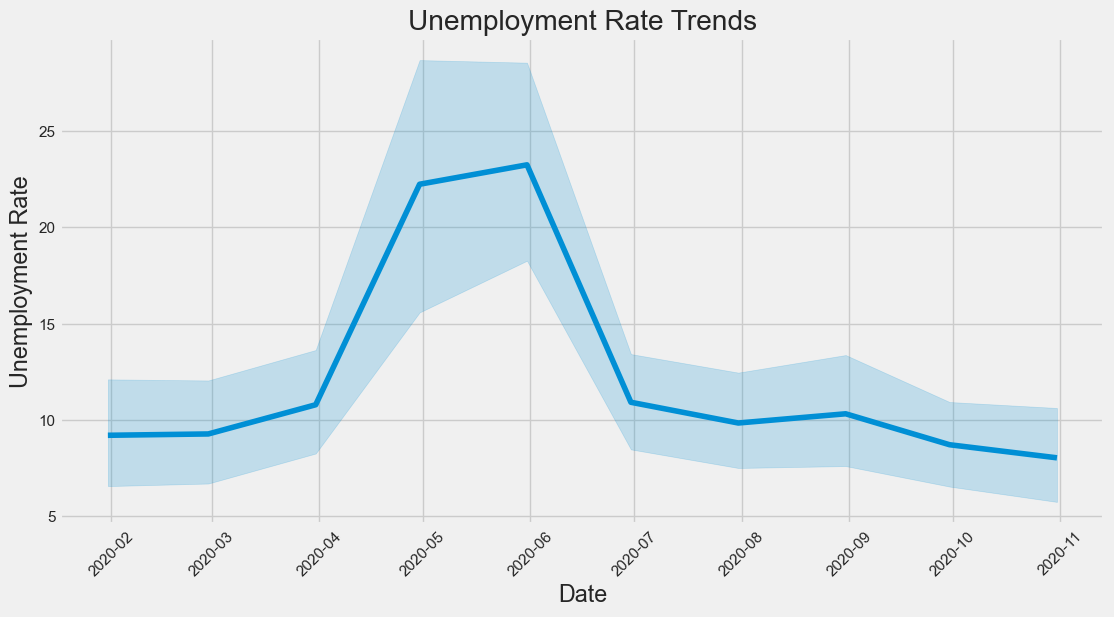

In [398]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='unemployment_rate', data=df2)
plt.title('Unemployment Rate Trends')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

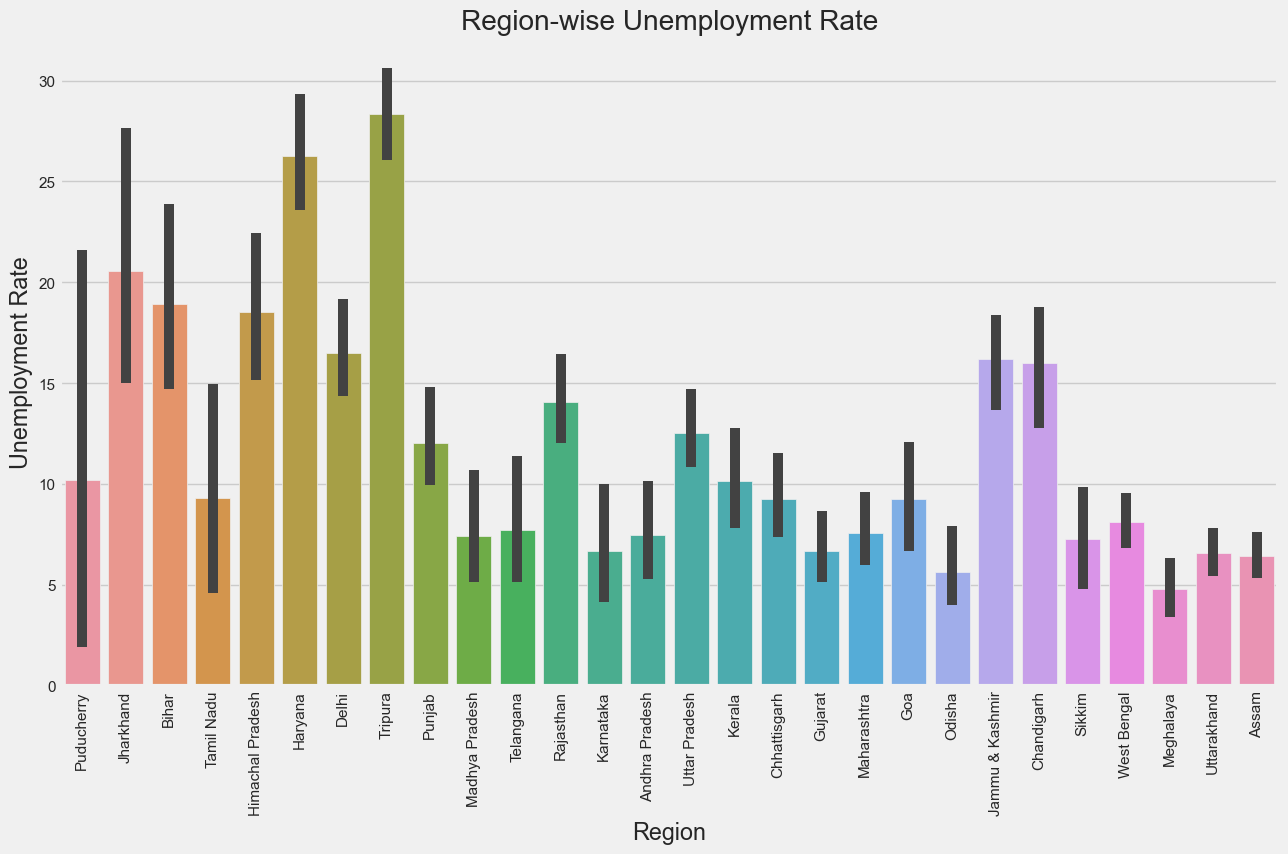

In [399]:
plt.figure(figsize=(14, 8))
sns.barplot(x='region', y='unemployment_rate', data=df1.sort_values('unemployment_rate', ascending=False))
plt.title('Region-wise Unemployment Rate')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=90)
plt.show()

In [402]:
pre_covid = df2[df2['date'] < '2020-03']
post_covid = df2[df2['date'] >= '2020-03']

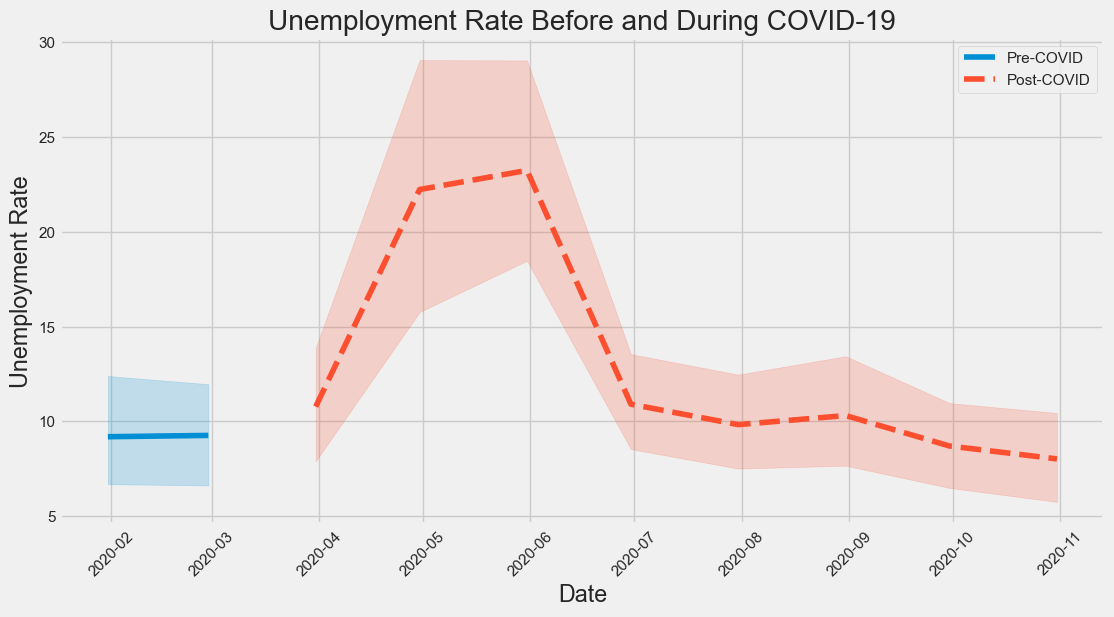

In [408]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='unemployment_rate', data=pre_covid, label='Pre-COVID')
sns.lineplot(x='date', y='unemployment_rate', data=post_covid, label='Post-COVID', linestyle='--')
plt.title('Unemployment Rate Before and During COVID-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [406]:
conclusions = """
1. The overall trend in unemployment rates shows significant fluctuations during the COVID-19 pandemic.
2. Some regions experienced higher unemployment rates compared to others.
3. A sharp increase in the unemployment rate was observed during the onset of the COVID-19 pandemic.
"""

print(conclusions)


1. The overall trend in unemployment rates shows significant fluctuations during the COVID-19 pandemic.
2. Some regions experienced higher unemployment rates compared to others.
3. A sharp increase in the unemployment rate was observed during the onset of the COVID-19 pandemic.

